# Spectrograms
- Rich time series like sound recordings can be converted to spectrograms, e.g., ussing FFT methods.
    - Spectrograms show the distribution in the frequency domain as a function of time.
    - In practice this is implemented by a moving window technique with local FFT computations (overlapping windows) called [Short-time Fourier transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform).
- Some limitations:
    - The decomposition is dependent on the sampling frequency, $f_s$ (samples per second), and time window length $T$ seconds.
    - The highest frequency that can be resolved is called the Nyquist frequency $= f_s/2$ Hz, i.e., 22050 Hz for a 44.1 kHz sampling (due to the Fourier transform).
    - The lowest frequency that can be resolved is the Rayleigh frequency $= 1/T$ Hz, i.e., for a window of length 1152 samples (MP3) and 44.1 kHz, this results in a minimum frequency of $\frac{1}{\frac{1152}{44100 Hz}} = \frac{1}{26.1 ms} = 38.3 Hz$.
    - Too short windows will give a "smearing effect" on the extracted frequencies (see [Wikipedia article](https://en.wikipedia.org/wiki/Short-time_Fourier_transform)) where precision is low on the extracted frequencies.
    - For time series, this means we have an upper bound (often of less interest) and a lower bound of the frequencies that can be resolved. The lower bound being "waves in the signal" $\leq$ "length of the window".

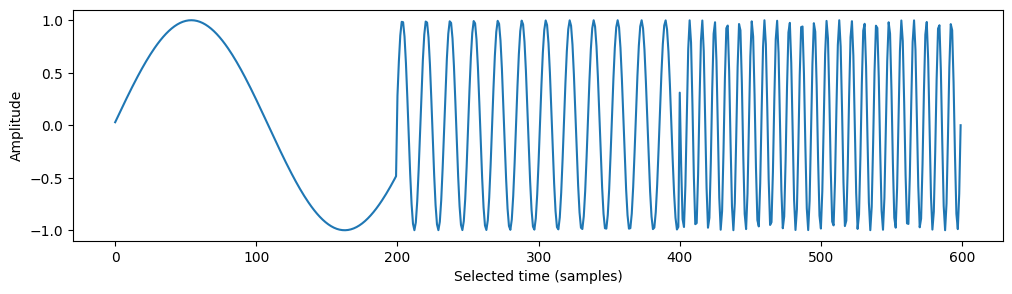

In [5]:
# Create a sine wave that starts low and increases during 4 seconds with a sampling rate of 44.1 kHz.
import numpy as np
fs = 44100 # Sampling rate
sec = 4   # Duration of the tone in seconds
t = np.linspace(0, 4, sec*fs)      # Time axis
f = np.linspace(200, 5000, sec*fs) # Frequency axis
y_approx = np.sin(2*np.pi*np.cumsum(f)/fs) # Approximation of the sine wave

# Plot the sine wave at the beginning, middle and end
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
plt.plot(range(600), np.hstack([y_approx[:200],y_approx[int(sec/2*fs):int(sec/2*fs)+200], y_approx[-200:]]))
plt.xlabel('Selected time (samples)')
plt.ylabel('Amplitude')
plt.show()

In [4]:
# Play the song using sounddevice
import sounddevice as sd
sd.play(y_approx, fs)

## Spectrogram computation
- [SciPy's Short Time Fourier Transform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html) returns all the ingredients needed to plot a spectrogram manually.
- [matplotlib's specgram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.specgram.html) combines computations and plotting

In [6]:
# Produce a spectrogram using scipy.signal.stft (short-time Fourier transform)
from scipy.signal import stft
f_stft, t_stft, Zxx = stft(y_approx, fs, nperseg=576)

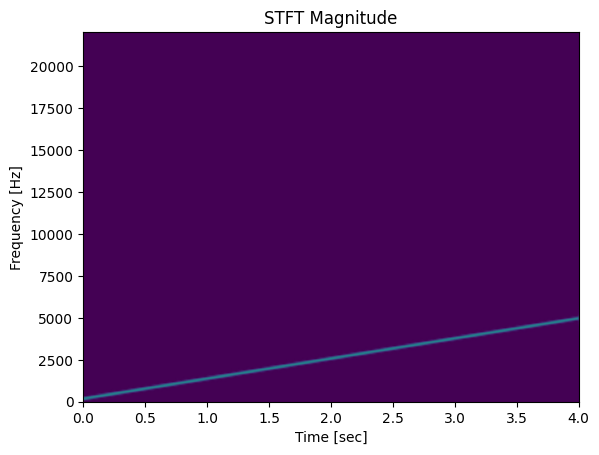

In [7]:
# Plot the spectrogram
import matplotlib.pyplot as plt
plt.pcolormesh(t_stft, f_stft, np.abs(Zxx), vmin=0, vmax=max(y_approx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

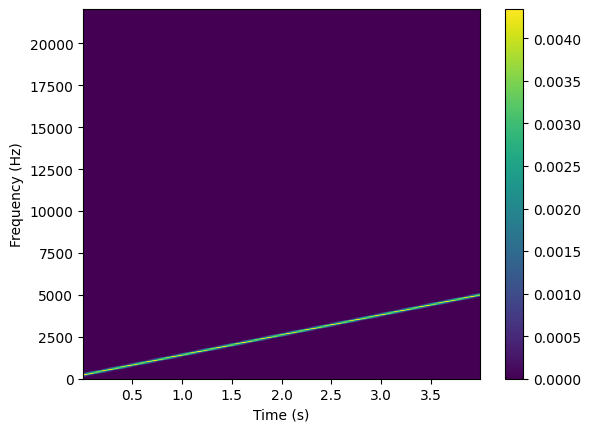

In [8]:
# Plot the spectrogram without pre-computed frequency and time axes
import matplotlib.pyplot as plt
plt.specgram(y_approx, Fs=fs, NFFT=576, noverlap=400, scale='linear')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.show()

In [9]:
# Music: https://www.chosic.com/free-music/all/ 
# Load MP3 file Bird.mp3 and plot the spectrogram
from pydub import AudioSegment
song = AudioSegment.from_mp3("../../data/Bird.mp3")

# Convert song to numpy array
samples = np.array(song.get_array_of_samples())

In [10]:
# Play the song using pydub
sd.play(samples, 44100)

In [11]:
# Produce a spectrogram using scipy.signal.stft (short-time Fourier transform)
f, t, Zxx = stft(samples, song.frame_rate, nperseg=576)

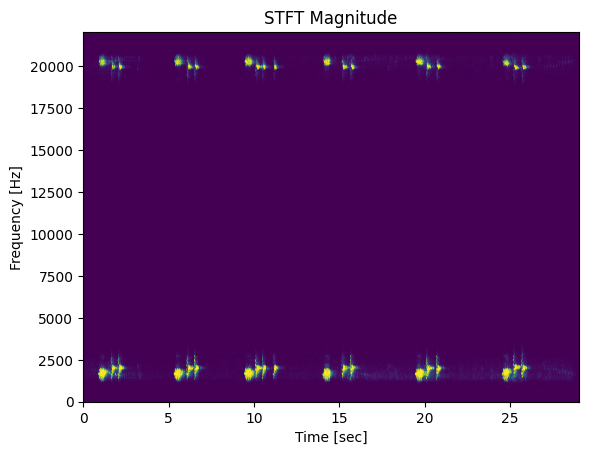

In [12]:
# Plot the spectrogram
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=max(samples)/100, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## Spectrogram on time series
- Here, we show a random series of data and its spectrogram.
- An abrupt change in the frequency domain will show up in the spectrogram, maybe indicating a change in the underlying process.

In [13]:
# Our friend, the random series, but now a little longer
rng = np.random.default_rng(0)
n = 2001
y = rng.standard_normal(n).cumsum()

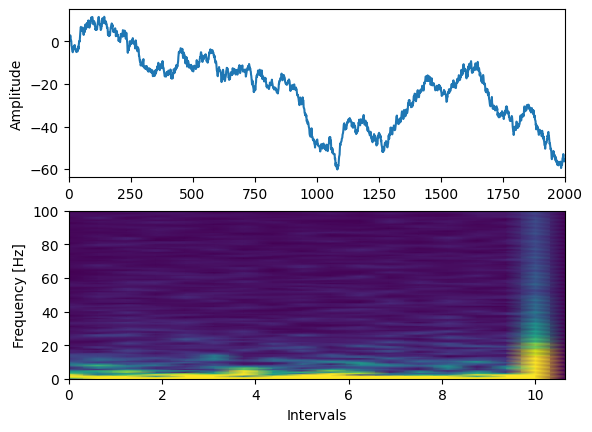

In [14]:
# Compute the spectrogram
f, t, Zxx = stft(y, 200, nperseg=250)

# Plot the series y and the spectrogram above each other
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1)
axs[0].plot(y)
axs[0].set_xlim(0, n-1)
axs[0].set_ylabel('Amplitude')
axs[1].pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud', vmax=1) # Play with the vmax parameter to enhance the contrast
axs[1].set_ylabel('Frequency [Hz]')
axs[1].set_xlabel('Intervals')
plt.show()

## Resources
- [Wikipedia: Short-time Fourier transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform)
- [SciPy's Short Time Fourier Transform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html)
- [matplotlib's specgram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.specgram.html)
- [Free sound files (incl. Bird)](https://www.chosic.com/free-music/all/)